In [1]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [4]:
# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [5]:
print(x_train[3])

[  40    2   13  188 1076 3222   19    4    2    7 2348  537   23   53
  537   21   82   40    2   13    2   14  280   13  219    4    2  431
  758  859    4  953 1052    2    7    2    5   94   40   25  238   60
    2    4    2  804    2    7    4    2  132    8   67    6   22   15
    9  283    8    2   14   31    9  242  955   48   25  279    2   23
   12 1685  195   25  238   60  796    2    4  671    7 2804    5    4
  559  154  888    7  726   50   26   49    2   15  566   30  579   21
   64 2574]


In [7]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total para

In [8]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행/학습
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 12s 486us/step - loss: 0.4636 - acc: 0.7615 - val_loss: 0.3430 - val_acc: 0.8490
Epoch 2/5
25000/25000 [==============================] - 11s 452us/step - loss: 0.2950 - acc: 0.8758 - val_loss: 0.3229 - val_acc: 0.8570
Epoch 3/5
25000/25000 [==============================] - 11s 450us/step - loss: 0.2494 - acc: 0.8995 - val_loss: 0.3273 - val_acc: 0.8573
Epoch 4/5
25000/25000 [==============================] - 11s 448us/step - loss: 0.2168 - acc: 0.9135 - val_loss: 0.3341 - val_acc: 0.8564
Epoch 5/5
25000/25000 [==============================] - 4s 154us/step

 Test Accuracy: 0.8526


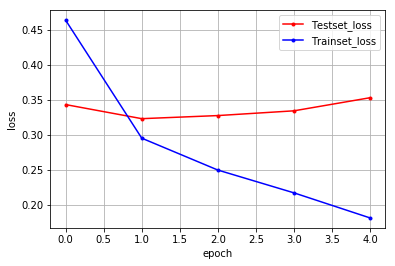

In [9]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()